# Imports and Installations

In [1]:
#First install pyRDDL as following

!pip install -q git+https://github.com/tasbolat1/pyRDDLGym.git --force-reinstall

## Install other packages if needed

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 864.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 17.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import copy
import itertools
import numpy as np
import random
import tqdm
import matplotlib.pyplot as plt
from collections import deque

from pyRDDLGym.Visualizer.MovieGenerator import MovieGenerator # loads visualizer utilites
from IPython.display import Image, display, clear_output # for displaying gifs in colab
from pyRDDLGym.Elevator import Elevator # imports Discrete Elevator

## Add more imports here

# Environment Initialization

In [3]:
env = Elevator(instance = 4)
print('Discrete environment actions:')
print(env.disc_actions)
print('Continuous environment actions:')
print(env.base_env.action_space)
print(f"Observation space size for the discrete Elevator Environment: {len(env.disc_states)}")

/usr/local/lib/python3.10/dist-packages/pyRDDLGym/Examples /usr/local/lib/python3.10/dist-packages/pyRDDLGym/Examples/manifest.csv
Available example environment(s):
HVAC -> Multi-zone and multi-heater HVAC control problem
PropDBN -> Simple propositional DBN.
MarsRover -> Multi Rover Navigation, where a group of agent needs to harvest mineral.
UAV_mixed -> Mixed action space version of multi-UAV problem where a group of UAVs have to reach goal positions in the 3d Space.
UAV_discrete -> Discrete action space version of multi-UAV problem where a group of UAVs have to reach goal positions in the 3d Space.
UAV_continuous -> Continuous action space version of multi-UAV problem where a group of UAVs have to reach goal positions in the 3d Space.
SupplyChainNet -> A supply chain network with factory and multiple warehouses.
Elevators -> The Elevator domain models evening rush hours when people from different floors in a building want to go down to the bottom floor using elevators.
CartPole_disc

/usr/local/lib/python3.10/dist-packages/pyRDDLGym/Core/Env/RDDLConstraints.py:85: UserWarning: Constraint does not have a structure of <action or state fluent> <op> <rhs>, where:
<op> is one of {<=, <, >=, >}
<rhs> is a deterministic function of non-fluents or constants only.
>> ( sum_{?f: floor} [ elevator-at-floor(?e, ?f) ] ) == 1
  warnings.warn(


Discrete environment actions:
{0: ('e0_movcurdir_0',), 1: ('e0_movcurdir_1',), 2: ('e0_close_0',), 3: ('e0_close_1',), 4: ('e0_open_0',), 5: ('e0_open_1',)}
Continuous environment actions:
Dict('move-current-dir___e0': Discrete(2), 'open-door___e0': Discrete(2), 'close-door___e0': Discrete(2))
Observation space size for the discrete Elevator Environment: 45056


# Hyperparameters

In [21]:
# Define hyperparameters

## IMPORTANT: <BEGIN> DO NOT CHANGE THIS CODE!
## GENERAL HYPERPARAMS
num_episodes = 3000
## IMPORTANT: <END> DO NOT CHANGE THIS CODE!

learning_rate = 3e-4
batch_size = 8192 #64
clip_value = 1.0  # Gradient clipping value

## ALGO SPECIFIC HYPERPARAMS
# Update the hyperparams as necessary for your implementation
gamma = 0.99
tau = 0.005
buffer_size = 10000


# Model Definition (COPY THIS OVER TO your AGENT.PY)


In [22]:
# Define the Model here - all component models (in case of actor-critic or others) MUST subclass nn.Module
class YourModel(nn.Module):
    def __init__(self):
        super(YourModel, self).__init__()
        # Your model layers and initializations here
        self.fc1 = nn.Linear(11, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 6)
        self.ac1 = nn.ReLU()
        self.ac2 = nn.ReLU()
        self.ac3 = nn.ReLU()

    def forward(self, x):
        # x will be a tensor with shape [batch_size, 11]
        # Your forward pass logic here
        # Ensure the output has shape [batch_size, 6]
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)
        return x

# Feature Extraction

In [23]:
## IMPORTANT: DO NOT CHANGE THIS CODE!
env_features = list(env.observation_space.keys())

def convert_state_to_list(state, env_features):
    out = []
    for i in env_features:
        out.append(state[i])
    return out

# Neural Net Initialization

In [24]:
# Initialize the network and optimizer
input_size = len(env_features)
output_size = 6

# INITIALIZE OTHER NETWORK PARAMS HERE
hidden_size = 128

# INITIALIZE YOUR NETWORK HERE
# your_network = YourModel()
policy_net = YourModel()
target_net = YourModel()

# INIT OPTIMIZER - Adam is a good start, but you can try changing this as well
optimizer = optim.AdamW(
    policy_net.parameters(), lr=learning_rate
)

In [25]:
# Convert networks to CUDA if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
policy_net.to(device)
target_net.to(device)

# Define other constructs (replay buffers, etc) as necessary

class Transition:
    def __init__(self, state, action, next_state, reward):
        self.state = state
        self.action = action
        self.next_state = next_state
        self.reward = reward

    @classmethod
    def from_batch(cls, batch):
        states = torch.stack([transition.state for transition in batch])
        actions = torch.tensor([transition.action for transition in batch])  # 转换为Tensor对象
        next_states = torch.stack([transition.next_state for transition in batch])
        rewards = torch.tensor([transition.reward for transition in batch])  # 转换为Tensor对象
        return cls(states, actions, next_states, rewards)

class ReplayMemory:
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []

    def push(self, state, action, next_state, reward):
        if len(self.memory) < self.capacity:
            self.memory.append(Transition(state, action, next_state, reward))
        else:
            self.memory.pop(0)
            self.memory.append(Transition(state, action, next_state, reward))

    def sample(self, batch_size):
        return random.sample(self.memory, min(batch_size, len(self.memory)))

    def __len__(self):
        return len(self.memory)

memory = ReplayMemory(buffer_size)

## Gradient Clipping (Optional, you can use torch's version as well)

In [26]:
# Define a function for gradient clipping
def clip_grads(model, clip_value):
    for param in model.parameters():
        if param.grad is not None:
            param.grad.data = torch.clamp(param.grad.data, -clip_value, clip_value)

# Live Plotting Setup

In [27]:
# Create a figure for plotting
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))
plt.ion()

# Lists to store rewards and episode numbers
rewards_list = []
episodes = []

def exponential_smoothing(data, alpha=0.1):
    """Compute exponential smoothing."""
    smoothed = [data[0]]  # Initialize with the first data point
    for i in range(1, len(data)):
        st = alpha * data[i] + (1 - alpha) * smoothed[-1]
        smoothed.append(st)
    return smoothed

def live_plot(data_dict, figure, ylabel="Total Rewards"):
    """Plot the live graph."""
    clear_output(wait=True)
    ax.clear()
    for label, data in data_dict.items():
        if label == "Total Reward":
            ax.plot(data, label=label, color="yellow", linestyle='--')

            # Compute and plot moving average for total reward
            ma = exponential_smoothing(data)
            ma_idx_start = len(data) - len(ma)
            ax.plot(range(ma_idx_start, len(data)), ma, label="Smoothed Value", linestyle="-", color="purple", linewidth=2)
        else:
            ax.plot(data, label=label)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper left')
    display(figure)


# RL Algorithm

In [28]:
# Define the loss calculation function
def calculate_loss(
    ## INCLUDE PARAMS YOU NEED HERE
    Q, Q_target
    ):
    ## TODO - CALCULATE LOSS VALUE & RETURN IT
    loss = F.smooth_l1_loss(Q, Q_target)
    return loss

In [29]:
steps_done = 0
EPS_START =1.0
EPS_END =0.1
EPS_DECAY = 1000
import math
def choose_action(
    ## INCLUDE PARAMS YOU NEED HERE
    state,
    ):
    ## TODO - RETURN AN INTEGER FROM 0 - 5 (both inclusive) based on your model training/testing strategy
    # state = torch.tensor(state, dtype=torch.float32).to(device)
    # Q = policy_net(state)
    # action = torch.argmax(Q)
    global steps_done

    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1

    if sample > eps_threshold:
        with torch.no_grad():
            action = policy_net(state).argmax().item()
            action = torch.tensor([[action]], device=device, dtype=torch.long)
            return action.item()
    else:
        action = torch.tensor([[env.action_space.sample()]], device=device, dtype=torch.long)
        return action.item()


    # return action.item()
    # return 0

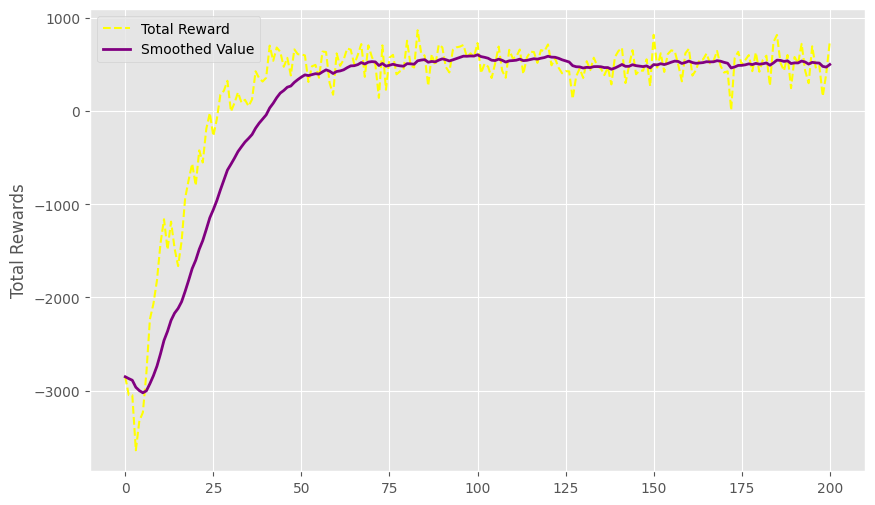

  7%|▋         | 201/3000 [34:41<8:03:12, 10.36s/it, Total Reward=751, Loss=4.04]


KeyboardInterrupt: 

In [30]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))
plt.ion()

# Create a tqdm progress bar
progress_bar = tqdm.tqdm(range(num_episodes), postfix={'Total Reward': 0, 'Loss': 0})

# RL algorithm training loop
for episode in progress_bar:
    total_reward = 0
    state = env.reset()

    while True:
        # Convert the original state to the suitable format for the network
        state_desc = env.disc2state(state)
        state_list = convert_state_to_list(state_desc, env_features)
        state_tensor = torch.tensor(state_list, dtype=torch.float32, device=device)

        action = choose_action(
            state_tensor
            ## TODO: FILL IN PARAMS FOR CALLING choose_action
        )

        # Take the chosen action and observe the next state and reward
        next_state, reward, done, _ = env.step((action))

        # Convert the next state to the suitable format for the network
        next_state_desc = env.disc2state(next_state)
        next_state_list = convert_state_to_list(next_state_desc, env_features)
        next_state_tensor = torch.tensor(next_state_list, dtype=torch.float32, device=device)


        # Hint: You may want to collect experiences from the environment to update the agent in batches!
        memory.push(state_tensor, action, next_state_tensor, reward)
        # assert len(memory) <= batch_size
        transitions = memory.sample(batch_size)
        batch = Transition.from_batch(transitions)
        state_batch = batch.state.to(device)
        action_batch = batch.action.to(device)
        next_state_batch = batch.next_state.to(device)
        reward_batch = batch.reward.to(device)
        # print('shape of reward_batch',reward_batch.shape)

        # Compute Q(s_t, a)
        policy_net.train()
        target_net.eval()
        Q = policy_net(state_batch).gather(1, action_batch.unsqueeze(1))

        # Compute V(s_{t+1})
        with torch.no_grad():
            next_state_values = target_net(next_state_batch)
            # print("next_state_values.shape",next_state_values.shape)
            # V = next_state_values.max(1)[0].unsqueeze(1)
            # V = torch.max(next_state_values, dim=1)[0].unsqueeze(1)
            V = next_state_values.max(1)[0].unsqueeze(1)
            # print("V.shape",V.shape)
            target = (V * gamma) + reward_batch.unsqueeze(1)
            # print("V.shape",V.shape,"reward_batch.shape",reward_batch.shape,"target.shape",target.shape)

        # Soft update of the target network's weights
        for target_param, policy_param in zip(target_net.parameters(), policy_net.parameters()):
            target_param.data.copy_(target_param.data * (1.0 - tau) + policy_param.data * tau)


        # print(Q.shape,target.shape) #torch.Size([5500, 1]) torch.Size([5500, 5500])

        loss = calculate_loss(
            ## TODO: FILL IN PARAMS FOR CALLING calculate_loss
            Q, target
        )

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        state = next_state
        total_reward += reward

        if done:
            break


    rewards_list.append(total_reward)
    episodes.append(episode)

    live_plot({'Total Reward': rewards_list}, fig)

    # Saving the model
    if episode%50 == 0:
      # torch.save(policy_net.state_dict(), f'model.pt')
      torch.save(policy_net, f'model.pt')

    progress_bar.set_postfix({'Total Reward': total_reward, 'Loss': loss.item()})

In [31]:
torch.save(policy_net, f'model.pt')

# Test Performance

In [32]:
# Initialize the environment
env = Elevator(instance = 4)

# Reset the environment to get the initial state

num_episodes_to_run = 100
rewards = []
# Run episodes using the trained Neural Net
for episode in tqdm.tqdm(range(num_episodes_to_run)):
    state = env.reset()
    total_reward = 0  # Initialize total reward for this episode
    while True:
        # Convert the current state to a dictionary
        state_desc = env.disc2state(state)
        state_list = convert_state_to_list(state_desc, env_features)
        state_tensor = torch.tensor(state_list, dtype=torch.float32, device=device).unsqueeze(0)

        # Use the Neural Net to get the action for the current state

        action = choose_action(
            ## TODO: FILL IN PARAMS FOR CALLING choose_action
            state_tensor
        )

        # Step the environment with the selected action
        next_state, reward, done, _ = env.step(action)

        # Update the total reward for this episode
        total_reward += reward

        # Update the current state for the next iteration
        state = next_state

        if done:
            break
    rewards.append(total_reward)

print(f"\nMean Rewards: {np.mean(rewards)}")
# Don't forget to close the environment when you're done
env.close()

/usr/local/lib/python3.10/dist-packages/pyRDDLGym/Examples /usr/local/lib/python3.10/dist-packages/pyRDDLGym/Examples/manifest.csv
Available example environment(s):
HVAC -> Multi-zone and multi-heater HVAC control problem
PropDBN -> Simple propositional DBN.
MarsRover -> Multi Rover Navigation, where a group of agent needs to harvest mineral.
UAV_mixed -> Mixed action space version of multi-UAV problem where a group of UAVs have to reach goal positions in the 3d Space.
UAV_discrete -> Discrete action space version of multi-UAV problem where a group of UAVs have to reach goal positions in the 3d Space.
UAV_continuous -> Continuous action space version of multi-UAV problem where a group of UAVs have to reach goal positions in the 3d Space.
SupplyChainNet -> A supply chain network with factory and multiple warehouses.
Elevators -> The Elevator domain models evening rush hours when people from different floors in a building want to go down to the bottom floor using elevators.
CartPole_disc

/usr/local/lib/python3.10/dist-packages/pyRDDLGym/Core/Env/RDDLConstraints.py:85: UserWarning: Constraint does not have a structure of <action or state fluent> <op> <rhs>, where:
<op> is one of {<=, <, >=, >}
<rhs> is a deterministic function of non-fluents or constants only.
>> ( sum_{?f: floor} [ elevator-at-floor(?e, ?f) ] ) == 1
  warnings.warn(


The building has 4 floors and 1 elevators. Each floor has maximum 3 people waiting. Each elevator can carry maximum of 10 people.


100%|██████████| 100/100 [00:54<00:00,  1.83it/s]


Mean Rewards: 523.4925
